In [1]:
# import packages
from matplotlib import rcParams
rcParams['figure.dpi'] = 120
rcParams["savefig.dpi"] = 120
rcParams['figure.facecolor'] = 'w'

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
from lmfit import Model

import warnings
warnings.filterwarnings('ignore')

# path joining version for other paths
notebook_path = os.path.abspath('h3p_scam_movie.ipynb' + "/../")
filepath = os.path.join(os.path.dirname(notebook_path), 'spec/')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])

# load fits data
jun02i_scam = []

start_jun02i = 1 # fits index start, min >= 1, max <= n
end_jun02i = 1904 # fits index end, min >= n, max <= 9999

# obtain all scam fits files
for i in range(filesize):
    if i >= 0 and i < 9:
        hdu_data = fits.getdata(filepath + 'jun02i000' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
    elif i >= 9 and i < 99:
        hdu_data = fits.getdata(filepath + 'jun02i00' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
    elif i >= 99 and i < 999: 
        hdu_data = fits.getdata(filepath + 'jun02i0' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
    elif i >= 999:
        hdu_data = fits.getdata(filepath + 'jun02i' + '{}.fits'.format(i+1), ignore_missing_end=True, ext=0)
        jun02i_scam.append(hdu_data)
jun02i_scam_array = np.array(jun02i_scam)

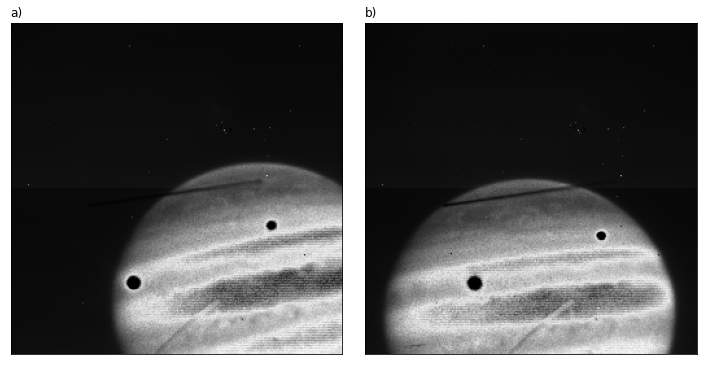

In [15]:
fig = plt.figure(figsize=(10,5), tight_layout=True)

fig.add_subplot(121)
plt.imshow(jun02i_scam_array[323], cmap='gist_gray')
plt.title('a)', loc='left')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

fig.add_subplot(122)
plt.title('b)', loc='left')
plt.imshow(jun02i_scam_array[588], cmap='gist_gray')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

In [95]:
# Generate png from fits and save all
for i in range(len(jun02i_scam_array)):
    if i >= 0 and i < 9:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i000'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i000'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()
    elif i >= 9 and i < 99:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i00'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i00'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()
    elif i >= 99 and i < 999:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i0'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i0'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()
    elif i >= 999:
        plt.figure()
        plt.imshow(jun02i_scam_array[i], cmap='gist_gray')
        plt.gca().invert_yaxis()
        plt.title('jun02i'+'{}.fits'.format(i+1))
        plt.savefig('images/jun02i'+'{}'.format(i+1), bbox_inches='tight')
        plt.close()

In [97]:
# Make video from png
import ffmpeg
(
    ffmpeg
    .input(os.path.dirname(notebook_path) + '/images/jupiter/*.png', pattern_type='glob', framerate=20)
    .output('images/jun02i.mp4', pix_fmt='rgb24')
    .overwrite_output()
    .run()
)

(None, None)